# The location recommendation to new restaurants

## 1. Introduction

Location is the most important factor of success to open a new restaurant. There are some key indexs to evaluate if the location is good or not:
- How's the neibourhood in terms of population to check if the restaurant would meet local consumers' needs
- What's the current competition situation within the location, in terms of the amount of restaurants, cusines offering, comments, etc
- What's the future opportunity within the location, considering local development plan

This project will conduct an analysis on Toronto neibourhood to set up a model for investers to make decision on how to select the location for their new restaurants.

## 2. Business Problem

## 3. Data Selection

### Data Preparation

#### List of postal codes of Toronto

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.



In [10]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import seaborn as sns
import folium # map rendering library



import types
from botocore.client import Config
import ibm_boto3

print('Libraries imported.')

Libraries imported.


In [17]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal code,Borough,Neighborhood
M1A,Not assigned,
M2A,Not assigned,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Regent Park / Harbourfront
M6A,North York,Lawrence Manor / Lawrence Heights
M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
M8A,Not assigned,
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Malvern / Rouge


In [18]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [20]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df = df1.groupby(['Postal code','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [23]:
# group neighborhoods of the same postal code
df = df.groupby(['Postal code','Borough']).aggregate(lambda x : ', '.join(x)).reset_index()
df.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### Insert Geospatial Coordinates CSV file to the code

In [26]:
GEO = pd.read_csv('https://cocl.us/Geospatial_data')
GEO.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge Toronto postal code with GEO info.

In [28]:
GEO.rename(columns={'Postal Code':'Postal code'},inplace=True)
df = pd.merge(df2,GEO,on='Postal code')
df.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


## Create a map of Toronto

In [31]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [33]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186c0',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Utilizing the Foursquare API to explore the neighborhoods and segment them

In [35]:
CLIENT_ID = 'MQQB01RRFDR0EEKYYVXTRMJ5VENGCS0GKOBGTOFEX3IBZCGK' # your Foursquare ID
CLIENT_SECRET = 'HWEV2CRDLYEM5P3E1II3UHPZB3GFF0YNYZSQNXOBARJVVJMK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [36]:
df.loc[0, 'Neighborhood']

'Parkwoods'

In [37]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


### Get the top 100 venues in Parkwoods whintin a radius of 500 metres

In [38]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get resullt
results = requests.get(url).json()

In [39]:
results

{'meta': {'code': 200, 'requestId': '5eaf51c2a2e538001b094d4b'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [40]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng
0,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,Park,43.751976,-79.332140
1,4cb11e2075ebb60cd1c4caad,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Queen's Park / Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
East Toronto
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
Do

In [48]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [49]:
toronto_venues.groupby('Neighborhood').count()['Venue Id']

Neighborhood
Agincourt                                                                                                                 5
Alderwood / Long Branch                                                                                                  10
Bathurst Manor / Wilson Heights / Downsview North                                                                        19
Bayview Village                                                                                                           4
Bedford Park / Lawrence Manor East                                                                                       24
Berczy Park                                                                                                              57
Birch Cliff / Cliffside West                                                                                              4
Brockton / Parkdale Village / Exhibition Place                                                                         

In [50]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 267 uniques categories.


In [51]:
toronto_venues = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")].reset_index()
toronto_venues.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,4,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant
1,5,Victoria Village,43.725882,-79.315572,4d689350b6f46dcb77ee15b2,The Frig,43.727051,-79.317418,French Restaurant
2,13,Regent Park / Harbourfront,43.654260,-79.360636,5612b1cc498e3dd742af0dc8,Impact Kitchen,43.656369,-79.356980,Restaurant
3,29,Regent Park / Harbourfront,43.654260,-79.360636,53a22c92498ec91fda7ce133,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,43,Regent Park / Harbourfront,43.654260,-79.360636,51ddecee498e1ffd34185d2f,El Catrin,43.650601,-79.358920,Mexican Restaurant


In [52]:
toronto_venues.shape

(487, 9)

In [53]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [54]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'] , toronto_venues['Venue Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186c0',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

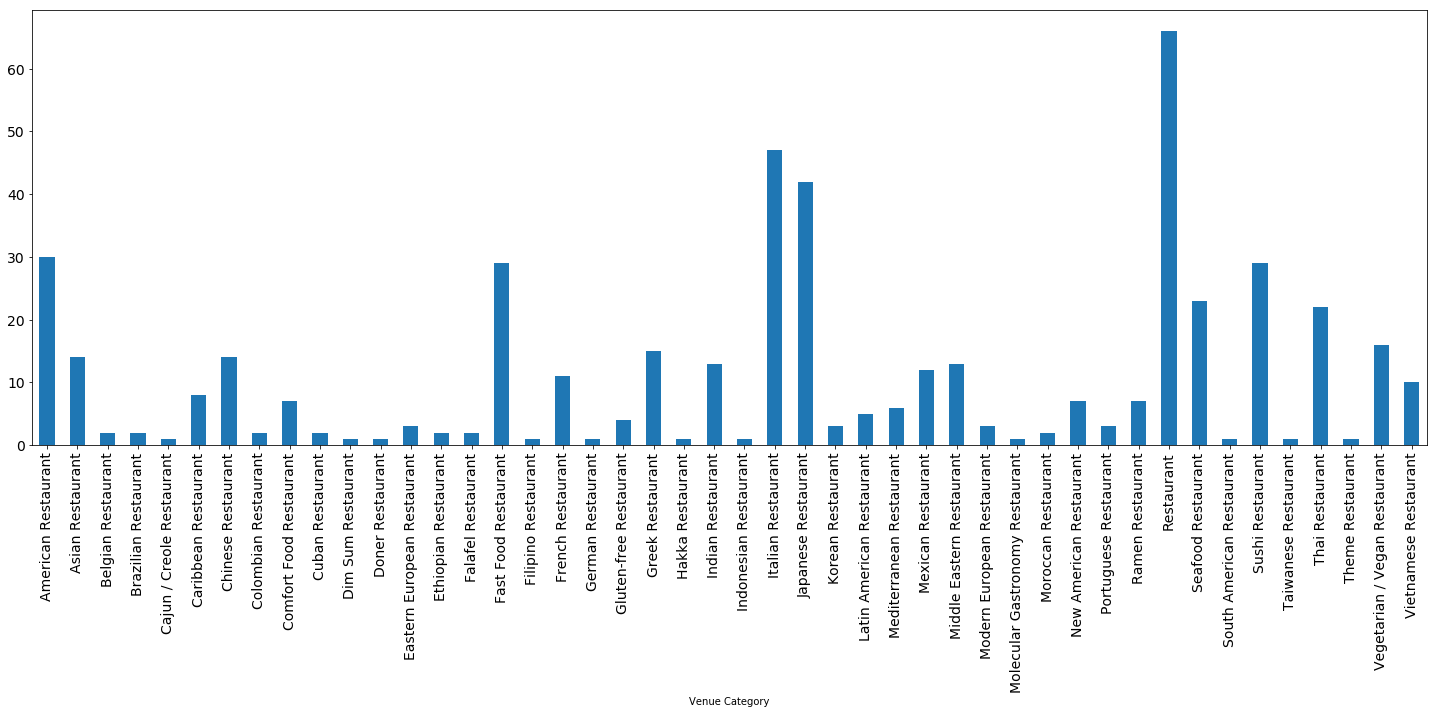

In [57]:
toronto_venues.groupby('Venue Category').size().plot.bar(figsize=(25,8), fontsize = 14)

In [122]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']])

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Belgian Restaurant,Venue Category_Brazilian Restaurant,Venue Category_Cajun / Creole Restaurant,Venue Category_Caribbean Restaurant,Venue Category_Chinese Restaurant,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,...,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Seafood Restaurant,Venue Category_South American Restaurant,Venue Category_Sushi Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Theme Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant
209,Toronto Dominion Centre / Design Exchange,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,Canada Post Gateway Processing Centre,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,"Garden District, Ryerson",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,Cliffside / Cliffcrest / Scarborough Village West,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,Commerce Court / Victoria Hotel,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Belgian Restaurant,Venue Category_Brazilian Restaurant,Venue Category_Cajun / Creole Restaurant,Venue Category_Caribbean Restaurant,Venue Category_Chinese Restaurant,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,...,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Seafood Restaurant,Venue Category_South American Restaurant,Venue Category_Sushi Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Theme Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant
0,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,Bathurst Manor / Wilson Heights / Downsview North,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0
2,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,Bedford Park / Lawrence Manor East,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.0,0.181818,0.000000,0.0,0.181818,0.0,0.090909,0.0,0.000000,0.0
4,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,...,0.0,0.166667,0.166667,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.0


In [124]:
toronto_grouped.shape

(63, 47)

In [125]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['cuisine','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                                    cuisine  freq
0  Venue Category_Latin American Restaurant   1.0
1        Venue Category_American Restaurant   0.0
2    Venue Category_New American Restaurant   0.0
3        Venue Category_Japanese Restaurant   0.0
4          Venue Category_Korean Restaurant   0.0


----Bathurst Manor / Wilson Heights / Downsview North----
                                    cuisine  freq
0           Venue Category_Sushi Restaurant  0.33
1  Venue Category_Middle Eastern Restaurant  0.33
2                 Venue Category_Restaurant  0.33
3        Venue Category_American Restaurant  0.00
4        Venue Category_Moroccan Restaurant  0.00


----Bayview Village----
                                    cuisine  freq
0        Venue Category_Japanese Restaurant   0.5
1         Venue Category_Chinese Restaurant   0.5
2      Venue Category_Portuguese Restaurant   0.0
3          Venue Category_Korean Restaurant   0.0
4  Venue Category_Latin American Restaurant   

In [126]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [127]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top cuisine
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common cuisine'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common cuisine'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine
0,Agincourt,Venue Category_Latin American Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Doner Restaurant,Venue Category_Gluten-free Restaurant,Venue Category_German Restaurant
1,Bathurst Manor / Wilson Heights / Downsview North,Venue Category_Sushi Restaurant,Venue Category_Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Dim Sum Restaurant
2,Bayview Village,Venue Category_Japanese Restaurant,Venue Category_Chinese Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Doner Restaurant,Venue Category_Gluten-free Restaurant
3,Bedford Park / Lawrence Manor East,Venue Category_Restaurant,Venue Category_Italian Restaurant,Venue Category_Sushi Restaurant,Venue Category_Indian Restaurant,Venue Category_Comfort Food Restaurant
4,Berczy Park,Venue Category_Restaurant,Venue Category_Seafood Restaurant,Venue Category_Comfort Food Restaurant,Venue Category_French Restaurant,Venue Category_Vegetarian / Vegan Restaurant


## Cluster Neibourhood

In [128]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

In [129]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [130]:
toronto_merged = neighborhoods_venues_sorted
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df.set_index('Neighborhood'), on='Neighborhood').reset_index()
toronto_merged.tail() # check the last columns!

,index,Cluster Labels,Neighborhood,1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,Postal code,Borough,Latitude,Longitude
60,59,0,Westmount,Venue Category_Chinese Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Doner Restaurant,Venue Category_Greek Restaurant,Venue Category_Gluten-free Restaurant,M9P,Etobicoke,43.696319,-79.532242
61,60,2,Wexford / Maryvale,Venue Category_Middle Eastern Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Doner Restaurant,Venue Category_Gluten-free Restaurant,Venue Category_German Restaurant,M1R,Scarborough,43.750072,-79.295849
62,61,0,Willowdale,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Indonesian Restaurant,M2N,North York,43.770120,-79.408493
63,61,0,Willowdale,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Indonesian Restaurant,M2R,North York,43.782736,-79.442259
64,62,0,Woburn,Venue Category_Korean Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Doner Restaurant,Venue Category_Gluten-free Restaurant,Venue Category_German Restaurant,M1G,Scarborough,43.770992,-79.216917


In [131]:
toronto_merged.groupby('Cluster Labels').count()['Neighborhood']

Cluster Labels
0    54
1     5
2     2
3     4
Name: Neighborhood, dtype: int64

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [133]:
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [134]:
toronto_clusters = toronto_grouped.groupby('Cluster Labels').mean()

In [135]:
toronto_clusters

,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Belgian Restaurant,Venue Category_Brazilian Restaurant,Venue Category_Cajun / Creole Restaurant,Venue Category_Caribbean Restaurant,Venue Category_Chinese Restaurant,Venue Category_Colombian Restaurant,Venue Category_Comfort Food Restaurant,Venue Category_Cuban Restaurant,...,Venue Category_Ramen Restaurant,Venue Category_Restaurant,Venue Category_Seafood Restaurant,Venue Category_South American Restaurant,Venue Category_Sushi Restaurant,Venue Category_Taiwanese Restaurant,Venue Category_Thai Restaurant,Venue Category_Theme Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0.035862,0.018297,0.002198,0.001442,0.002747,0.051767,0.061055,0.001442,0.010791,0.00601,...,0.008599,0.134606,0.026692,0.002137,0.075812,0.001748,0.036328,0.00074,0.016494,0.037646
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.395833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.062500,0.000000


In [136]:
toronto_clusters_trans = toronto_clusters.transpose()
toronto_clusters_trans.head()

Cluster Labels,0,1,2,3
Venue Category_American Restaurant,0.035862,0.0,0.0,0.395833
Venue Category_Asian Restaurant,0.018297,0.0,0.0,0.000000
Venue Category_Belgian Restaurant,0.002198,0.0,0.0,0.000000
Venue Category_Brazilian Restaurant,0.001442,0.0,0.0,0.000000
Venue Category_Cajun / Creole Restaurant,0.002747,0.0,0.0,0.000000


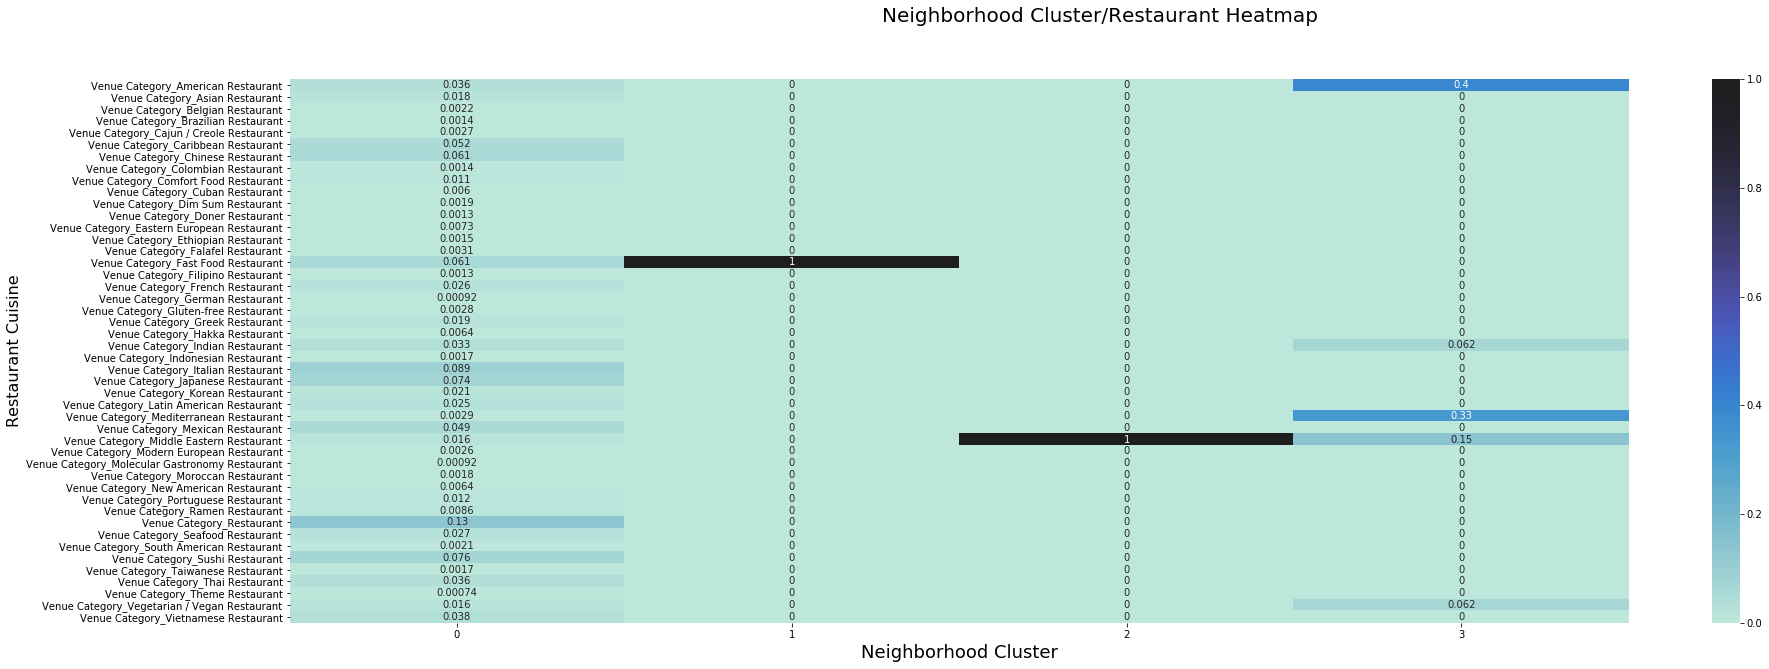

In [137]:
fig, ax = plt.subplots(figsize=(30,10))  
# plot heatmap

ax = sns.heatmap(toronto_clusters_trans, center=1, annot=True, ax=ax)

fig.suptitle('Neighborhood Cluster/Restaurant Heatmap', fontsize=20)
plt.xlabel('Neighborhood Cluster', fontsize=18)
plt.ylabel('Restaurant Cuisine', fontsize=16)
# save figure
plt.show()

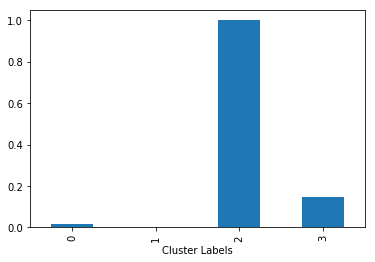

In [139]:
toronto_clusters_trans.loc['Venue Category_Middle Eastern Restaurant'].plot(kind='bar')